In [ ]:
      #   CLASSIFICATION MODEL

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
ds=pd.read_csv('loans.csv')
ds


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
#TO FIND SHAPE
ds.shape

(614, 13)

In [7]:
# TO FIND DATA TYPES
ds.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
# TO FIND NULL VALUES
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# REMOVE NULL VALUES
ds=ds.dropna()
ds


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
ds.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [14]:
# CHECKING FOR THE COUNTS OF EVERY VALUES IN EACH COLUMNS
for i in ds.columns:
    print(ds[i].value_counts())
    

Loan_ID
LP001003    1
LP001005    1
LP002347    1
LP002345    1
LP002342    1
           ..
LP001674    1
LP001673    1
LP001666    1
LP001665    1
LP002990    1
Name: count, Length: 480, dtype: int64
Gender
Male      394
Female     86
Name: count, dtype: int64
Married
Yes    311
No     169
Name: count, dtype: int64
Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64
Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64
Self_Employed
No     414
Yes     66
Name: count, dtype: int64
ApplicantIncome
2500    7
4583    6
2600    5
6000    4
4166    4
       ..
3418    1
3975    1
3244    1
4408    1
7583    1
Name: count, Length: 405, dtype: int64
CoapplicantIncome
0.0       216
1666.0      5
2500.0      4
5625.0      3
2083.0      3
         ... 
1250.0      1
3021.0      1
983.0       1
1775.0      1
240.0       1
Name: count, Length: 232, dtype: int64
LoanAmount
120.0    13
100.0    13
110.0    13
187.0    12
128.0     9
         ..
280.0   

In [17]:
ds.nunique()


Loan_ID              480
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [18]:
# STATISTICAL ANALYSIS
# DESCRIBE THE DATA SET

ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


          if there is difference between mean and median then possibility for presence of ' skewness
          if there is difference between max and 75% then posibility for presence of "outliers"

ApplicantIncome         Axes(0.125,0.712609;0.168478x0.167391)
CoapplicantIncome    Axes(0.327174,0.712609;0.168478x0.167391)
LoanAmount           Axes(0.529348,0.712609;0.168478x0.167391)
Loan_Amount_Term     Axes(0.731522,0.712609;0.168478x0.167391)
Credit_History          Axes(0.125,0.511739;0.168478x0.167391)
dtype: object

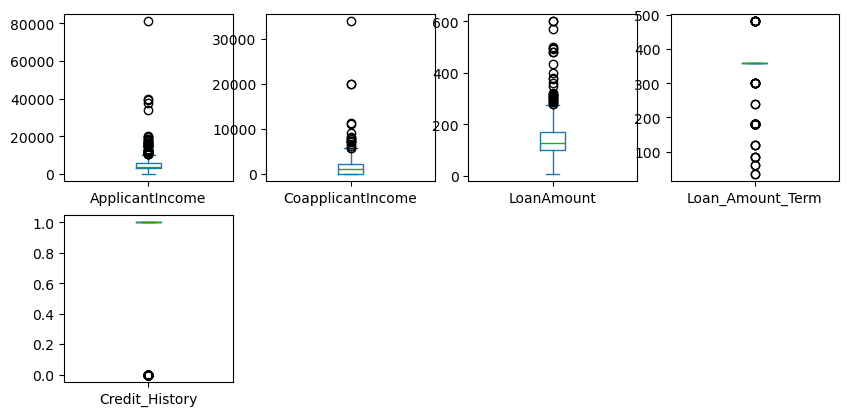

In [19]:
# CHECKING FOR OUTLIERS
ds.plot(kind='box', subplots=True,figsize=(10,10),layout=(4,4))

          Outliers in each column so we need to remove the ' outliers'from the columns


In [21]:
from scipy.stats import zscore
f=ds[['ApplicantIncome']]
z=np.abs(zscore(f))
z

,ApplicantIncome
1,0.137970
2,0.417536
3,0.491180
4,0.112280
5,0.009319
...,...
609,0.435196
610,0.222210
611,0.478206
612,0.391846


In [22]:
print(np.where(z>3))


(array([120, 142, 144, 319, 347], dtype=int64), array([0, 0, 0, 0, 0], dtype=int64))


In [29]:
# REMOVEING OUTLIERS:
ds1=ds[(z<3).all(axis=1)]
ds1


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [44]:
from scipy.stats import zscore
f1=ds1[['CoapplicantIncome']]
z1=np.abs(zscore(f1))
z1

,CoapplicantIncome
1,0.030426
2,0.605857
3,0.293921
4,0.605857
5,0.995275
...,...
609,0.605857
610,0.605857
611,0.514277
612,0.605857


In [31]:
print(np.where(z>3))

(array([120, 142, 144, 319, 347], dtype=int64), array([0, 0, 0, 0, 0], dtype=int64))


In [45]:
# REMOVING OUTLIERS
ds2=ds1[(z<3).all(axis=1)]
ds2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [46]:
from scipy.stats import zscore
f2=ds2[['LoanAmount']]
z2=np.abs(zscore(f2))
z2

,LoanAmount
1,0.195657
2,0.998065
3,0.299193
4,0.027410
5,1.603290
...,...
609,0.933354
610,1.334558
611,1.422101
612,0.567925


In [34]:
print(np.where(z>3))

(array([120, 142, 144, 319, 347], dtype=int64), array([0, 0, 0, 0, 0], dtype=int64))


In [47]:
# REMOVING OUTLIERS
ds3=ds2[(z<3).all(axis=1)]
ds3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [48]:
from scipy.stats import zscore
f3=ds3[['Loan_Amount_Term']]
z3=np.abs(zscore(f3))
z3

,Loan_Amount_Term
1,0.273055
2,0.273055
3,0.273055
4,0.273055
5,0.273055
...,...
609,0.273055
610,2.494396
611,0.273055
612,0.273055


In [39]:
print(np.where(z>3))

(array([120, 142, 144, 319, 347], dtype=int64), array([0, 0, 0, 0, 0], dtype=int64))


In [50]:
# REMOVING OUTLIERS
ds4=ds3[(z<3).all(axis=1)]
ds4


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [49]:
from scipy.stats import zscore
f4=ds4[['Credit_History']]
z4=np.abs(zscore(f3))
z4

,Loan_Amount_Term
1,0.273055
2,0.273055
3,0.273055
4,0.273055
5,0.273055
...,...
609,0.273055
610,2.494396
611,0.273055
612,0.273055


In [42]:
print(np.where(z>3))

(array([120, 142, 144, 319, 347], dtype=int64), array([0, 0, 0, 0, 0], dtype=int64))


In [51]:
# REMOVING OUTLIERS
ds5=ds4[(z<3).all(axis=1)]
ds5


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [61]:
# CHECKING FOE SKEWNESS for only ' Numerical column'
ds5.select_dtypes(include=['number']).skew()

Loan_ID              0.000000
Gender              -1.661856
Married             -0.613996
Dependents           0.950248
Education            1.472141
Self_Employed        2.120046
ApplicantIncome      2.110552
CoapplicantIncome    5.895653
LoanAmount           2.269377
Loan_Amount_Term    -2.345843
Credit_History      -2.044198
Property_Area       -0.043962
Loan_Status         -0.837629
dtype: float64

In [56]:
# SEPERATING CATEGORICAL & NUMERICAL COLUMNS
cat_col=[]
num_col=[]
for i in ds.dtypes.index:
    if ds.dtypes[i]=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print(cat_col)
print(num_col)

        
    

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


              Label Encoding Technique for only "categorical columns"

In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_col:
    ds5[i]=le.fit_transform(ds5[i].astype(str))
ds5

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,470,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,471,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,472,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,473,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [64]:
ds.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

       In this dats det 'loan status' is the target value = y
       other columns are independent variales =x


In [65]:
 #It shows only the input columns

x=ds5.drop('Loan_Status',axis=1)
y=ds5['Loan_Status']
print(x)


     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
1          0       1        1           1          0              0   
2          1       1        1           0          0              1   
3          2       1        1           0          1              0   
4          3       1        0           0          0              0   
5          4       1        1           2          0              1   
..       ...     ...      ...         ...        ...            ...   
609      470       0        0           0          0              0   
610      471       1        1           3          0              0   
611      472       1        1           1          0              0   
612      473       1        1           2          0              0   
613      474       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2

In [66]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 475, dtype: int32


       SCALING TO REMOVE BIASNESS FOR INPUT VARIABLES 
                 STANDAED SCALING

In [68]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-1.72840822,  0.47019112,  0.73975082, ...,  0.2730552 ,
         0.40874952, -1.31739075],
       [-1.72111535,  0.47019112,  0.73975082, ...,  0.2730552 ,
         0.40874952,  1.252468  ],
       [-1.71382249,  0.47019112,  0.73975082, ...,  0.2730552 ,
         0.40874952,  1.252468  ],
       ...,
       [ 1.71382249,  0.47019112,  0.73975082, ...,  0.2730552 ,
         0.40874952,  1.252468  ],
       [ 1.72111535,  0.47019112,  0.73975082, ...,  0.2730552 ,
         0.40874952,  1.252468  ],
       [ 1.72840822, -2.12679473, -1.35180655, ...,  0.2730552 ,
        -2.44648608, -0.03246137]])

In [69]:
# It shows the number in whole number 
ds5

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,470,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,471,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,472,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,473,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [70]:
x=pd.DataFrame(data=x)
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.728408,0.470191,0.739751,0.228350,-0.506571,-0.398167,-0.103946,-0.030426,-0.195657,0.273055,0.408750,-1.317391
1,-1.721115,0.470191,0.739751,-0.757708,-0.506571,2.511512,-0.574234,-0.605857,-0.998065,0.273055,0.408750,1.252468
2,-1.713822,0.470191,0.739751,-0.757708,1.974059,-0.398167,-0.698120,0.293921,-0.299193,0.273055,0.408750,1.252468
3,-1.706530,0.470191,-1.351807,-0.757708,-0.506571,-0.398167,0.317026,-0.605857,-0.027410,0.273055,0.408750,1.252468
4,-1.699237,0.470191,0.739751,1.214409,-0.506571,2.511512,0.143824,0.995275,1.603290,0.273055,0.408750,1.252468
...,...,...,...,...,...,...,...,...,...,...,...,...
470,1.699237,-2.126795,-1.351807,-0.757708,-0.506571,-0.398167,-0.603943,-0.605857,-0.933354,0.273055,0.408750,-1.317391
471,1.706530,0.470191,0.739751,2.200468,-0.506571,-0.398167,-0.245656,-0.605857,-1.334558,-2.494396,0.408750,-1.317391
472,1.713822,0.470191,0.739751,0.228350,-0.506571,-0.398167,0.932590,-0.514277,1.422101,0.273055,0.408750,1.252468
473,1.721115,0.470191,0.739751,1.214409,-0.506571,-0.398167,0.787314,-0.605857,0.567925,0.273055,0.408750,1.252468


           In the above data set all values in between the -3 to +3 (z score)

In [71]:
# NOW  TAKE THE VALUE COUNT FOR Y ( TARGET VALUE)
y.value_counts()

Loan_Status
1    329
0    146
Name: count, dtype: int64

      NOW WE NEED TO BALANCE THE DATA SET BY USING SMOTE


In [73]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)
y.value_counts()

Loan_Status
0    329
1    329
Name: count, dtype: int64

            NOW THE DATA SET IS BALANCED BY USING SMOTE

In [78]:
# NOW WE CAN SPLIT THE DATA SET INTO TRAIN ANS TEST
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score, KFold


In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [80]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(460, 12)
(460,)
(198, 12)
(198,)


              LOGISTIC REGREESION

In [82]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
testprediction=lr.predict(x_test)
print(accuracy_score(y_test,testprediction))
print(confusion_matrix(y_test,testprediction))
print(classification_report(y_test,testprediction))
KFold=KFold(n_splits=5,shuffle=True)
score=cross_val_score(lr,x,y,cv=KFold)
print(score)
print(score.mean())
print(((accuracy_score(y_test,testprediction))-score.mean()))


0.6717171717171717
[[43 56]
 [ 9 90]]
              precision    recall  f1-score   support

           0       0.83      0.43      0.57        99
           1       0.62      0.91      0.73        99

    accuracy                           0.67       198
   macro avg       0.72      0.67      0.65       198
weighted avg       0.72      0.67      0.65       198

[0.64393939 0.74242424 0.71212121 0.70229008 0.63358779]
0.6868725422160536
-0.015155370498881937


            DESCRIPTION FOR CONFUSION MATRIX

1.TRUE POSITIVE (TP) = 43
    ( Actually it is True and ML also predicted it is True )

2.FALSE NEGATIVE = 56
    ( Actually it is True but ML predicted it is False )

3.FALSE POSITIVE = 9
    ( Actually it is False but ML predicted it is True )

4.TRUE NEGATIVE = 90
    ( Actually it is False and ML also predicted it is False )
    